# 23.1 多智能体强化学习入门
- 基本概念
- IPPO 算法

> 之前介绍的算法都是 **单智能体** 强化学习算法，其基本假设是动态环境是 **稳态的（stationary）**，即 **状态转移概率** 和 **奖励函数** 不变

> 但在现实中，许多系统并非由单一主体组成，而是由 **多个智能体** 构成。在一些任务中，智能体可能需要合作以共同完成任务（如机器人协作、团队对抗游戏），也可能需要竞争以实现对抗模拟（如博弈论中的零和游戏）此时就要求环境中有多个智能体进行交互和学习，这样的任务被称为 **多智能体强化学习（multi-agent reinforcement learning，MARL）**

> **MARL** 中的每个智能体在和环境交互的同时也在和 **其他智能体** 进行直接或者间接的**交互**，因此在每个智能体的视角下，环境是 **非稳态的（non-stationary）**：对于一个智能体而言，即使在 **相同的状态** 下采取 **相同的动作**，得到的状态转移和奖励信号的分布可能在**不断改变**
> 所以多智能体的协作，本身会造就：
- 训练的环境更为复杂
> 其次:
- 智能体目标可能是不同的，不同智能体需要最大化自己的利益
- 训练难度更高，可能需要大规模分布式训练来提高效率

***参考文献：***
1. [多智能体深度强化学习的若干关键科学问题](https://kns.cnki.net/kcms2/article/abstract?v=hEVkP-djbGzQFZYseuDP5znRnCKidSEjzwYYgqH7xXiRLM90zl4RCyS7NqBJ9ADgnVnqy7EFO_RTQU-IvB4q7kgt0X64dkA9SwmnGm5AUMOwU9B38ZnNOfeVxU0gDSmgGyTGkNXHoPWIJwW0nmBKe-o19dokZVne9ebzRraoD1_TqMx5EDX-xQ==&uniplatform=NZKPT&language=CHS)
2. [A Survey and Critique of Multiagent Deep Reinforcement Learning](https://arxiv.org/abs/1810.05587)

***多智能体环境表示：***
> 可以用 **一个元组$(N,\mathcal{S},\mathcal{A},\mathcal{R},P)$** 来表示 **一个多智能体环境**
- 其中$N$是智能体的数目
- $\mathcal{S}=S_1\times\cdots\times S_N$ 是 所有智能体的状态集合
- $\mathcal{A}=A_1\times\cdots\times A_N$ 是 所有智能体的动作集合
- $\mathcal{R}=r_1\times\cdots\times r_N$ 是 所有智能体奖励函数的集合
- $P$是环境的状态转移概率

## 23.1.1 多智能体强化学习的基本求解范式
> 如果只是基于之前已经熟悉的 **单智能体算法**，拓展多智能体的概念，那么 **多智能体强化学习算法** 主要分两种思路：

> 1. **完全中心化（fully centralized）方法** ：将多个智能体进行决策当作一个 **超级智能体** 在进行决策（*所有智能体的状态聚合在一起当作一个全局的超级状态；所有智能体的动作连起来作为一个联合动作*）。
- 优点：由于已经知道了所有智能体的状态和动作，因此对这个 **超级智能体** 来说，**环境依旧是稳态**的，一些**单智能体的算法的收敛性**依旧可以得到保证。
- 缺点：样的做法不能很好地扩展到智能体数量很多或者环境很大的情况，因为这时候将所有的信息简单暴力地拼在一起会**导致维度爆炸**，**训练复杂度巨幅提升**的问题往往不可解决。

> 2. **完全去中心化（fully decentralized）方法** ：与完全中心化方法相反的范式便是假设 **每个智能体都在自身的环境中独立地进行学习，不考虑其他智能体的改变**。完全去中心化方法直接对 **每个智能体用一个单智能体强化学习算法来学习**。
- 缺点：环境是非稳态的，智能体之间没有信息共享，训练的收敛性不能得到保证。
- 优点：随着智能体数量的增加有比较好的扩展性，不会遇到维度灾难而导致训练不能进行下去。


## 23.1.2 完全去中心化 算法 IPPO
> 此类算法被称为 **独立学习（Independent Learning）**。由于对于每个智能体使用单智能体算法 **PPO（PPO-截断版本）** 进行训练，因此这个算法叫作 **独立 PPO（Independent PPO，IPPO）算法**。

***算法流程：***

对于$N$个智能体，**初始化** 每个智能体各自的策略以及价值函数
for 训练轮数 $k= 0, 1, 2\ldots$ do

- 所有智能体在环境中交互 **分别获得各自的一条轨迹数据**
- 对每个智能体，基于当前的价值函数用 GAE 计算优势函数的估计
- 对每个智能体，通过最大化其 PPO-截断的目标来 **更新其策略**
- 对每个智能体，通过均方误差损失函数 **优化其价值函数**

end for


## 23.1.3 Combat 环境说明
> **Combat 环境** 是 **ma_gym库**（[详细下载以及环境说明](https://github.com/koulanurag/ma-gym)） 中的一个多智能体环境：
（由于该库所依赖的一些库的版本与之前算法使用的库版本不同，为了 **防止依赖冲突**，这里可以新建一个虚拟环境使用 **ma_gym库**）
![Combat-v0](Illustrations/Combat-v0.gif)

> 在一个二维的格子世界上，有两个队伍进行对战模拟游戏：
> - 每个团队由 $m$ 个智能体组成，他们的初始位置以 $5 × 5$ 均匀采样 围绕团队中心形成方形
> - 每个智能体的动作集合为：向四周移动 $1$ 格（离散动作：0，1，2，3），攻击周围（$3 × 3$）格范围内的敌对智能体，或者不采取任何行动
> - 每个智能体攻击后可有冷却时间
> - 起初每个智能体有 $3$ 点生命值，如果智能体在敌人的攻击范围内被攻击到了，则会扣 $1$ 生命值，生命值掉为 $0$ 则死亡
> - 如果一支队伍中的所有智能体都死亡，另一支队伍将获胜（当前版本默认最大步长为 100）

**己方队伍（红色）** 移动策略由算法训练；**敌方队伍（蓝色）** 默认使用固定的算法：攻击在范围内最近的敌人，如果攻击范围内没有敌人，则向敌人靠近。



In [1]:
from ma_gym.envs.combat.combat import Combat

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

from utils.advantage import compute_advantage

## 23.1.4 IPPO 代码实践

### PPO（PPO-截断版本）部分
> 与之前的 **离散动作版本** 基本一致：
1. 网络层数略微不同
2. 一次更新中，只训练一次

In [3]:
class PolicyNet(torch.nn.Module):
    def __init__(self, state_dim, hidden_dim, action_dim):
        super(PolicyNet, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = torch.nn.Linear(hidden_dim, action_dim)

    def forward(self, x):
        x = F.relu(self.fc2(F.relu(self.fc1(x))))
        return F.softmax(self.fc3(x), dim=1)


class ValueNet(torch.nn.Module):
    def __init__(self, state_dim, hidden_dim):
        super(ValueNet, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = torch.nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc2(F.relu(self.fc1(x))))
        return self.fc3(x)


In [4]:
class PPO:
    """ PPO算法,采用截断方式 """
    def __init__(self, state_dim, hidden_dim, action_dim, actor_lr, critic_lr, lmbda, eps, gamma, device):
        
        self.actor = PolicyNet(state_dim, hidden_dim, action_dim).to(device)
        self.critic = ValueNet(state_dim, hidden_dim).to(device)
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=critic_lr)
        self.gamma = gamma
        self.lmbda = lmbda
        self.eps = eps  # PPO中截断范围的参数
        self.device = device

    
    def take_action(self, state):
        state = torch.tensor(np.array([state]), dtype=torch.float).to(self.device)
        probs = self.actor(state)
        action_dist = torch.distributions.Categorical(probs)
        action = action_dist.sample()
        return action.item()

    def update(self, transition_dict):
        
        states_np = np.array(transition_dict['states'])  # 转换成统一的大 np.ndarray，PyTorch更高效处理
        states = torch.tensor(states_np, dtype=torch.float).to(self.device)
        actions = torch.tensor(transition_dict['actions']).view(-1, 1).to(self.device)
        rewards = torch.tensor(transition_dict['rewards'], dtype=torch.float).view(-1, 1).to(self.device)
        next_states_np = np.array(transition_dict['next_states'])  # 转换成统一的大 np.ndarray，PyTorch更高效处理
        next_states = torch.tensor(next_states_np, dtype=torch.float).to(self.device)
        dones = torch.tensor(transition_dict['dones'], dtype=torch.float).view(-1, 1).to(self.device)
        
        td_target = rewards + self.gamma * self.critic(next_states) * (1 - dones)  # 时序差分目标
        td_delta = td_target - self.critic(states)                                 # 时序差分误差
        advantage = compute_advantage(self.gamma, self.lmbda, td_delta.cpu()).to(self.device)
        
        old_log_probs = torch.log(self.actor(states).gather(1,actions)).detach()
        
        #----------------------------------------------------------------------------
        log_probs = torch.log(self.actor(states).gather(1, actions))
        ratio = torch.exp(log_probs - old_log_probs)
        
        surr1 = ratio * advantage
        surr2 = torch.clamp(ratio, 1 - self.eps, 1 + self.eps) * advantage  # 截断
        actor_loss = torch.mean(-torch.min(surr1, surr2))  # PPO损失函数
        critic_loss = torch.mean(F.mse_loss(self.critic(states), td_target.detach()))
        self.actor_optimizer.zero_grad()
        self.critic_optimizer.zero_grad()
        actor_loss.backward()
        critic_loss.backward()
        self.actor_optimizer.step()
        self.critic_optimizer.step()
        #-------------------------------------------------------------------------------

###  IPPO 部分
> 训练时使用 **参数共享（parameter sharing）** 的技巧：对于**所有智能体**使用 **同一套策略参数** 。
> - 这样做的**好处**是，能使得模型训练数据更多，同时训练更稳定
> - 这样做的**前提**是，两个智能体是同质的（homogeneous），即它们的状态空间和动作空间是完全一致的，并且它们的优化目标也完全一致

#### 环境设置：

##### 演示:
> 可通过该演示，观察环境的各个字段设置

In [5]:
from ma_gym.envs.combat.combat import Combat
import time

# 创建Combat环境，格子世界的大小为15x15，己方智能体和敌方智能体数量都为2
env1 = Combat(grid_shape=(15, 15), n_agents=2, n_opponents=2, step_cool=-1)
print('实际上为冷却(step_cool+1 = %d)步后再攻击' % env1._step_cool)

# 开启渲染（mode="human"）
obs = env1.reset()
done_n = [False] * env1.n_agents

while not all(done_n):
    actions = [env1.action_space[i].sample() for i in range(env1.n_agents)]
    obs, reward_n, done_n, info = env1.step(actions)
    print(reward_n, info, done_n, env1.opp_health.items(), env1._step_count)
    env1.render(mode="human")   # 可视化
    time.sleep(0.3)
    
env1.close()

实际上为冷却(step_cool+1 = 0)步后再攻击
[0, 0] {'health': {0: 3, 1: 3}} [False, False] dict_items([(0, 3), (1, 3)]) 1
[0, 0] {'health': {0: 3, 1: 3}} [False, False] dict_items([(0, 3), (1, 3)]) 2
[0, -1] {'health': {0: 3, 1: 2}} [False, False] dict_items([(0, 3), (1, 3)]) 3
[0, -1] {'health': {0: 3, 1: 1}} [False, False] dict_items([(0, 3), (1, 3)]) 4
[0, -1] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 5
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 6
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 7
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 8
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 9
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 10
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 11
[0, 0] {'health': {0: 3, 1: 0}} [False, False] dict_items([(0, 3), (1, 3)]) 12
[0, 0] {'health': {0: 3, 1: 0

In [6]:
env = Combat(grid_shape=(15, 15), n_agents=2, n_opponents=2, step_cool=-1, step_cost=-0.1)
s = env.reset()
print(env._max_steps)

100


#### 参数设置：

In [7]:
actor_lr = 3e-4
critic_lr = 1e-3
lmbda = 0.97
eps = 0.2
gamma = 0.99
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


state_dim = env.observation_space[0].shape[0]
hidden_dim = 64
action_dim = env.action_space[0].n
#两个智能体共享同一个策略
agent = PPO(state_dim, hidden_dim, action_dim, actor_lr, critic_lr, 
            lmbda, eps, gamma, device)


num_episodes = 100000

#### 测试与训练：

***判断某一动作执行之后，己方智能体团队是否获胜：***

In [8]:
win_list = []
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            transition_dict_1 = {
                'states': [],
                'actions': [],
                'next_states': [],
                'rewards': [],
                'dones': []
            }
            transition_dict_2 = {
                'states': [],
                'actions': [],
                'next_states': [],
                'rewards': [],
                'dones': []
            }
            s = env.reset()  # 返回 m 组状态
            terminal = False
            while not terminal:
                a_1 = agent.take_action(s[0])
                a_2 = agent.take_action(s[1])
                next_s, r, done, info = env.step([a_1, a_2])
                
                transition_dict_1['states'].append(s[0])
                transition_dict_1['actions'].append(a_1)
                transition_dict_1['next_states'].append(next_s[0])
                # 如果敌方血量总和为 0，则认为赢了
                transition_dict_1['rewards'].append(
                    r[0] + 100 if (sum([v for k, v in env.opp_health.items()]) == 0) else r[0])
                transition_dict_1['dones'].append(False)
                
                transition_dict_2['states'].append(s[1])
                transition_dict_2['actions'].append(a_2)
                transition_dict_2['next_states'].append(next_s[1])
                transition_dict_2['rewards'].append(
                    r[1] + 100 if (sum([v for k, v in env.opp_health.items()]) == 0) else r[1])
                transition_dict_2['dones'].append(False)
                
                s = next_s
                terminal = all(done)  # 到达 最大步长 或者 一方智能体全部没有血了
                
            win_list.append(1 if (sum([v for k, v in env.opp_health.items()]) == 0) else 0)
            agent.update(transition_dict_1)
            agent.update(transition_dict_2)
            
            if (i_episode + 1) % 100 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'win_rate':
                    '%.3f' % np.mean(win_list[-100:])
                })
            pbar.update(1)

Iteration 9: 100%|██████████| 10000/10000 [24:44<00:00,  6.73it/s, episode=100000, win_rate=0.320]


#### 效果展示：
> 与之前的实验 **追踪训练过程中的回报** 不同，这里将 IPPO 训练的 **智能体团队的胜率** 作为算法指标，展示效果

In [9]:
import pandas as pd

win_array = np.array(win_list)
# 每100条轨迹的获胜率取一次平均，用于绘图
win_array = np.mean(win_array.reshape(-1, 100), axis=1)
episodes_list = np.arange(win_array.shape[0]) * 100

# 创建 DataFrame
df1 = pd.DataFrame({'Episodes': episodes_list, 'Returns': win_array})
# 保存为 CSV 文件
df1.to_csv('IPPO_Clip_Combat_win-rate_data.csv', index=False)

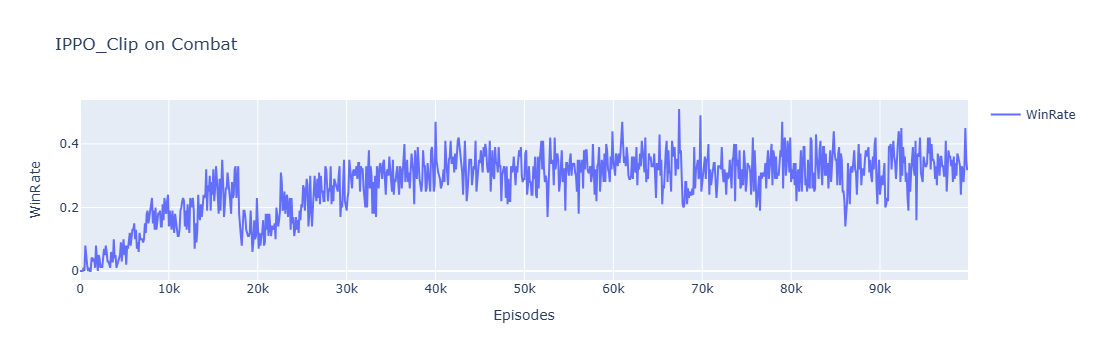

In [3]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('IPPO_Clip_Combat_win-rate_data.csv')  # 从 CSV 文件中读取数据
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Episodes'], y=df['Returns'], mode='lines', name='WinRate'))
fig.update_layout(
    title='IPPO_Clip on Combat',
    xaxis_title='Episodes',
    yaxis_title='WinRate',
    showlegend=True
)
fig.show()

可以看出，在 **智能体数量较少** 的时候，**IPPO** 这种 **完全去中心化学习** 可以提升一定的胜率，**但达到的胜率也比较有限**。可能有以下几点原因：
- 奖励设置依然稀疏，难以促进团队协同
- 只依赖个体局部观测和局部奖励，智能体之间没有共享信息，难以形成协助
- 环境对每个智能体来说是非平稳的（其他智能体在不断变化策略），训练容易震荡或收敛到局部最优，难以做到最优策略

种种这些都会限制学习效果...